##### (check PYTHONPATH)

In [2]:
pwd

'/Users/nielsbidault/cernbox/EBISSimulation/demo'

In [3]:
cd ..

/Users/nielsbidault/cernbox/EBISSimulation


### Import ebisim and all packages needed:

In [4]:
# Import what we need
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import ebisim

In [5]:
ELEMENT = "K"
species = ebisim.EBISSpecies(ELEMENT)

# Poisson equation solver:

### Initialize Poisson equation solver

In [6]:
print(species)
pb = ebisim.PoissonSolver(ELEMENT, 0.2, 4000, nb_p=10000)

EBISSpecies - Element: Potassium (K, Z = 19)
r_e / r_d = 0.051


### Debugging energy density array
!Problem when y flip sign! i.e when the electron beam starts to be fully compensated

In [7]:
NkT = np.zeros(2 * (species.element.z + 1))
NkT[5] = 3e15
NkT[species.element.z + 6] = 50


In [8]:
model = ['boltzmann', 'gaussian']


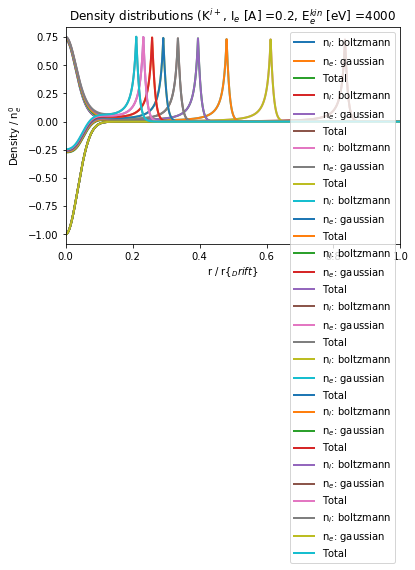

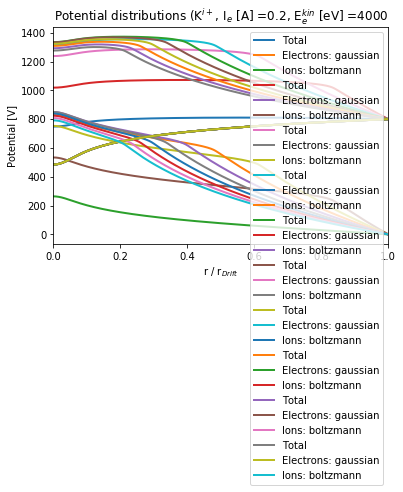

In [14]:
for i in range(10):
    NkT[5] = 2.41e16 + i * 1e14
    _ = pb.solve(NkT, model)
    _ = pb.plot_densities()
plt.show()

for i in range(10):
    NkT[5] = 2.41e16 + i * 1e14
    _ = pb.solve(NkT, model)
    _ = pb.plot_potential()
plt.show()


### Models of charge-density distributions for ionic and electronic species
Ion models: boltzmann, maxwell3, maxwell5, gaussian, null
Electron models: gaussian, normal (caracteristic size: Herrmann radius)

In [15]:
model = ['boltzmann', 'gaussian']
_ = pb.solve(NkT, model)

In [16]:
print(pb._element)

ChemicalElement(z=19, symbol='K', name='Potassium', a=39)


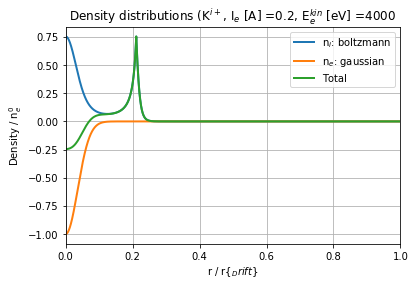

In [17]:
_ = pb.plot_densities()
plt.show()

### Normalized charge-state ionic density distributions

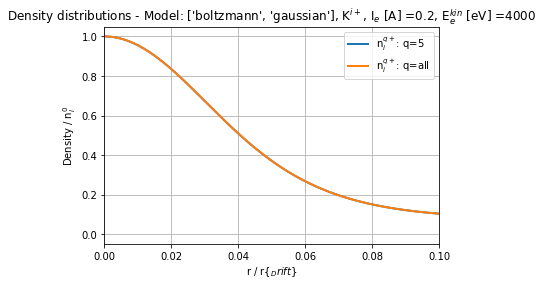

In [18]:
_ = pb.plot_densities_all()
plt.show()

### Potential in the drift area
U_tube = 800 V.
Potential if only electron beam. 
Potential (total) with ion and electron beam.
Difference of latter two potentials (ion beam contribution).

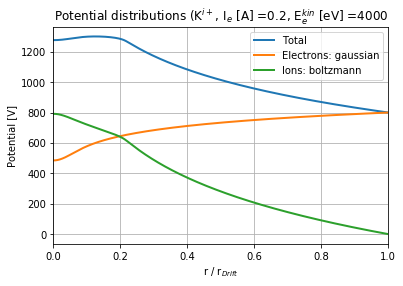

In [19]:
_ = pb.plot_potential()

plt.show()

### Combine all distribution models

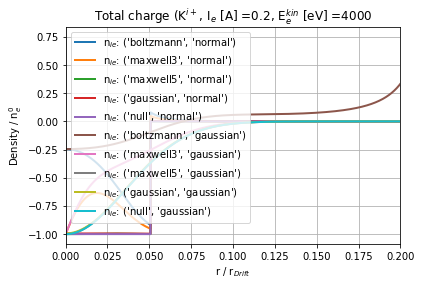

In [20]:
_ = pb.plot_densities_combine(NkT)
plt.show()

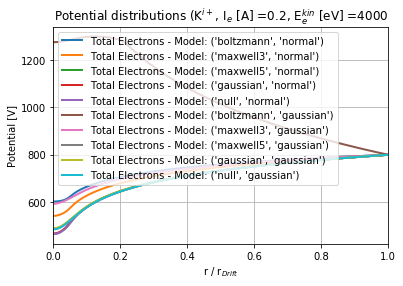

In [21]:
_ = pb.plot_potential_combine(NkT)
plt.show()